In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset_train = pd.read_csv('/content/drive/My Drive/DL Projects/Occupancy-detection/datatraining.csv')

In [614]:
dataset_train.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [615]:
dataset_test.tail(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2660,24.290000,25.700000,808.0,1150.25,0.004829,1
2661,24.330000,25.736000,809.8,1129.20,0.004848,1
2662,24.330000,25.700000,817.0,1125.80,0.004841,1
2663,24.356667,25.700000,813.0,1123.00,0.004849,1
2664,24.408333,25.681667,798.0,1124.00,0.004860,1


In [0]:
dataset_train = dataset_train.drop(labels = 'date', axis = 1)

In [617]:
print('training dataset shape : {}'.format(dataset_train.shape))
print('test dataset shape : {}'.format(dataset_test.shape))

training dataset shape : (8143, 6)
test dataset shape : (2665, 6)


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
X = dataset_train.iloc[:,:5].values
y = dataset_train.iloc[:,5:6].values

In [0]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [621]:
X.shape

(8143, 5)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2)

In [0]:
Y_train = np.expand_dims(Y_train, axis = 1)

In [625]:
X_train = np.expand_dims(X_train, axis = 2)
X_train.shape

(6514, 5, 1)

In [0]:
X_test = np.expand_dims(X_test, axis = 2)
Y_test = np.expand_dims(Y_test, axis = 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [0]:
model = Sequential()

model.add(LSTM(10, input_shape=(None,1)))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [629]:
history = model.fit(X_train, Y_train, batch_size = 64, epochs = 100, validation_data=(X_test, Y_test))

Epoch 1/100
102/102 [==============================] - 1s 7ms/step - loss: 0.6253 - accuracy: 0.7774 - val_loss: 0.5546 - val_accuracy: 0.7772
Epoch 2/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7906 - val_loss: 0.4311 - val_accuracy: 0.7772
Epoch 3/100
102/102 [==============================] - 0s 4ms/step - loss: 0.3472 - accuracy: 0.8394 - val_loss: 0.3147 - val_accuracy: 0.8674
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 0.2871 - accuracy: 0.8749 - val_loss: 0.2992 - val_accuracy: 0.8711
Epoch 5/100
102/102 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.8800 - val_loss: 0.3021 - val_accuracy: 0.8662
Epoch 6/100
102/102 [==============================] - 0s 4ms/step - loss: 0.2772 - accuracy: 0.8784 - val_loss: 0.2929 - val_accuracy: 0.8711
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 0.2751 - accuracy: 0.8819 - val_loss: 0.2910 - val_accuracy: 0.8754

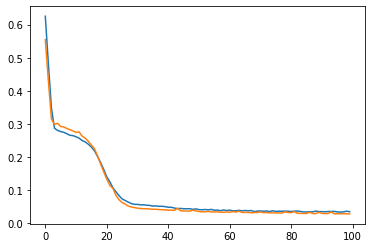

In [630]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

**LETS START WITH BASIC MATHS TO FIND ACCURACY FOR 1ST TEST DATASET**

In [0]:
dataset_test = pd.read_csv('/content/drive/My Drive/DL Projects/Occupancy-detection/datatest.csv')
dataset_test = dataset_test.drop(labels = 'date', axis = 1)

In [0]:
# taking values to predict
test = dataset_test.iloc[:,:5].values

In [0]:
# real occupancy which is either 1 or 0
real_occupancy = dataset_test.iloc[:,5:6].values

In [0]:
inputs = test

In [0]:
# feature scailing
inputs = sc.fit_transform(inputs)

In [0]:
# reshaping array to pass in model
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1) )

In [637]:
inputs.shape

(2665, 5, 1)

In [0]:
# predictions
preds = model.predict(inputs)

In [639]:
preds

array([[0.8586223 ],
       [0.87140316],
       [0.88464165],
       ...,
       [0.94287544],
       [0.9419923 ],
       [0.9487242 ]], dtype=float32)

In [0]:
# just taking integers in float32
real_occupancy = real_occupancy.astype('float32')

In [641]:
# we will count how many 1's we have in our real occupancies
ones_of_real_occ = np.count_nonzero(real_occupancy)
ones_of_real_occ

972

In [642]:
# total no. of rows
real_occupancy.size

2665

In [0]:
# just rounding off to get either 0 or 1
round_preds = np.round(preds)

In [644]:
# again counting 1's from predictions part
ones_of_preds = np.count_nonzero(round_preds)
ones_of_preds

1003

In [0]:
# subtracting 1'S OF PREDICTED OCCUPANCY FROM 1'S OF REAL OCCUPANCY
# which gives us the error , i.e the no. of wrong predictions we made.


ERROR = ones_of_preds-ones_of_real_occ

In [0]:
#  calculating accuracy
total_values = real_occupancy.size
err = ERROR
correct_predictions = total_values - err

accuracy = (correct_predictions / total_values) * 100 #normal formula of calculating percentage

In [647]:
accuracy

98.83677298311446

**LETS START WITH BASIC MATHS TO FIND ACCURACY FOR 2ND TEST DATASET**

In [0]:
dataset_test2 = pd.read_csv('/content/drive/My Drive/DL Projects/Occupancy-detection/datatest2.csv')
dataset_test2 = dataset_test2.drop(labels = 'date', axis = 1)
# dataset_test2.head(4)

In [649]:
dataset_test2.shape

(9752, 6)

In [0]:
# taking values to predict
test2 = dataset_test2.iloc[:,:5].values

In [651]:
test2.shape

(9752, 5)

In [0]:
# real occupancy which is either 1 or 0
real_occupancy2 = dataset_test2.iloc[:,5:6].values

In [0]:
inputs2 = test2

In [0]:
# feature scailing
inputs2 = sc.fit_transform(inputs2)

In [0]:
# reshaping array to pass in model
inputs2 = np.reshape(inputs2, (inputs2.shape[0], inputs2.shape[1], 1) )

In [656]:
inputs2.shape

(9752, 5, 1)

In [0]:
# predictions
preds2 = model.predict(inputs2)

In [658]:
preds2.size

9752

In [659]:
# we will count how many 1's we have in our real occupancies
ones_of_real_occupancy2 = np.count_nonzero(real_occupancy2)
ones_of_real_occupancy2

2049

In [660]:
# total no. of rows
real_occupancy2.size

9752

In [0]:
# just rounding off to get either 0 or 1
round_preds2 = np.round(preds2)

In [662]:
# again counting 1's from predictions part
ones_of_preds2 = np.count_nonzero(round_preds2)
ones_of_preds2

2243

In [663]:
# subtracting 1'S OF PREDICTED OCCUPANCY FROM 1'S OF REAL OCCUPANCY
# which gives us the error , i.e the no. of wrong predictions we made.


ERROR2 = ones_of_preds2-ones_of_real_occupancy2
ERROR2

194

In [0]:
#  calculating accuracy
total_values2 = real_occupancy2.size
err2 = ERROR2
correct_predictions2 = total_values2 - err2

accuracy2 = (correct_predictions2 / total_values2) * 100 #normal formula of calculating percentage

In [665]:
accuracy2

98.01066447908121